## - 불러올 패키지 목록

In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as pca  # 대문자로 사용할 경우 sklearn 의 PCA와 겹침

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *

# SciPy 패키지
import scipy as sp
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지

# pingouin 패키지
import pingouin as pg

# scikit-learn 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)
from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.tree import *  # 의사결정나무 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공
from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

# mlxtend 패키지
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 
from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# label별 데이터 카운트를 위한 모듈
from collections import Counter  # https://docs.python.org/3/library/collections.html

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False

# 데이터 확인 및 전처리

## Dataset 불러오기 및 data 정보 확인

### 데이터 불러오기

In [2]:
# 분석할 데이터 불러오기 / 데이터프레임 생성
df_iris = pd.read_csv(r'C:\Users\Boanerges\GitHub\TIL\rawdata\iris.csv',
                      index_col = 'Unnamed: 0')
df_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


### data 정보 확인

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## x값(예측변수), y값(목표변수) 설정

In [4]:
# 목표변수와 나머지 변수들을 따로 저장
x = df_iris.iloc[: , 0:4 ]
y = df_iris.iloc[:, 4 ]

# 학습/테스트용 데이터셋 분리
- `sklearn.model_selection.train_test_split()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
# 데이터셋 나누고 라벨 분포 확인
x_train, x_test, y_train, y_test  = train_test_split( x, y,
                                                      test_size = 0.3,
                                                      random_state = 0 )

# 라벨별 데이터 분포 확인
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({'virginica': 39, 'setosa': 34, 'versicolor': 32})

Counter({'versicolor': 18, 'setosa': 16, 'virginica': 11})


# 결정나무 모델 생성 및 학습
- `sklearn.tree.DecisionTreeClassifier()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Attributes : `.classes_`
- Attributes : `.feature_importances_` : feature별 중요도

- Methods : `.fit()`, `.predict()`, `.score()`

## 결정나무 모델 생성 및 train 데이터로 학습

In [6]:
# 결정나무 모델 생성
model_dtclf = DecisionTreeClassifier( random_state = 0 )

# 모델 학습
model_dtclf.fit( x_train, y_train )

DecisionTreeClassifier(random_state=0)

In [7]:
# 모델이 분류한 카테고리 확인
model_dtclf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# 시각화

## 결정나무 시각화
- `sklearn.tree.plot_tree()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

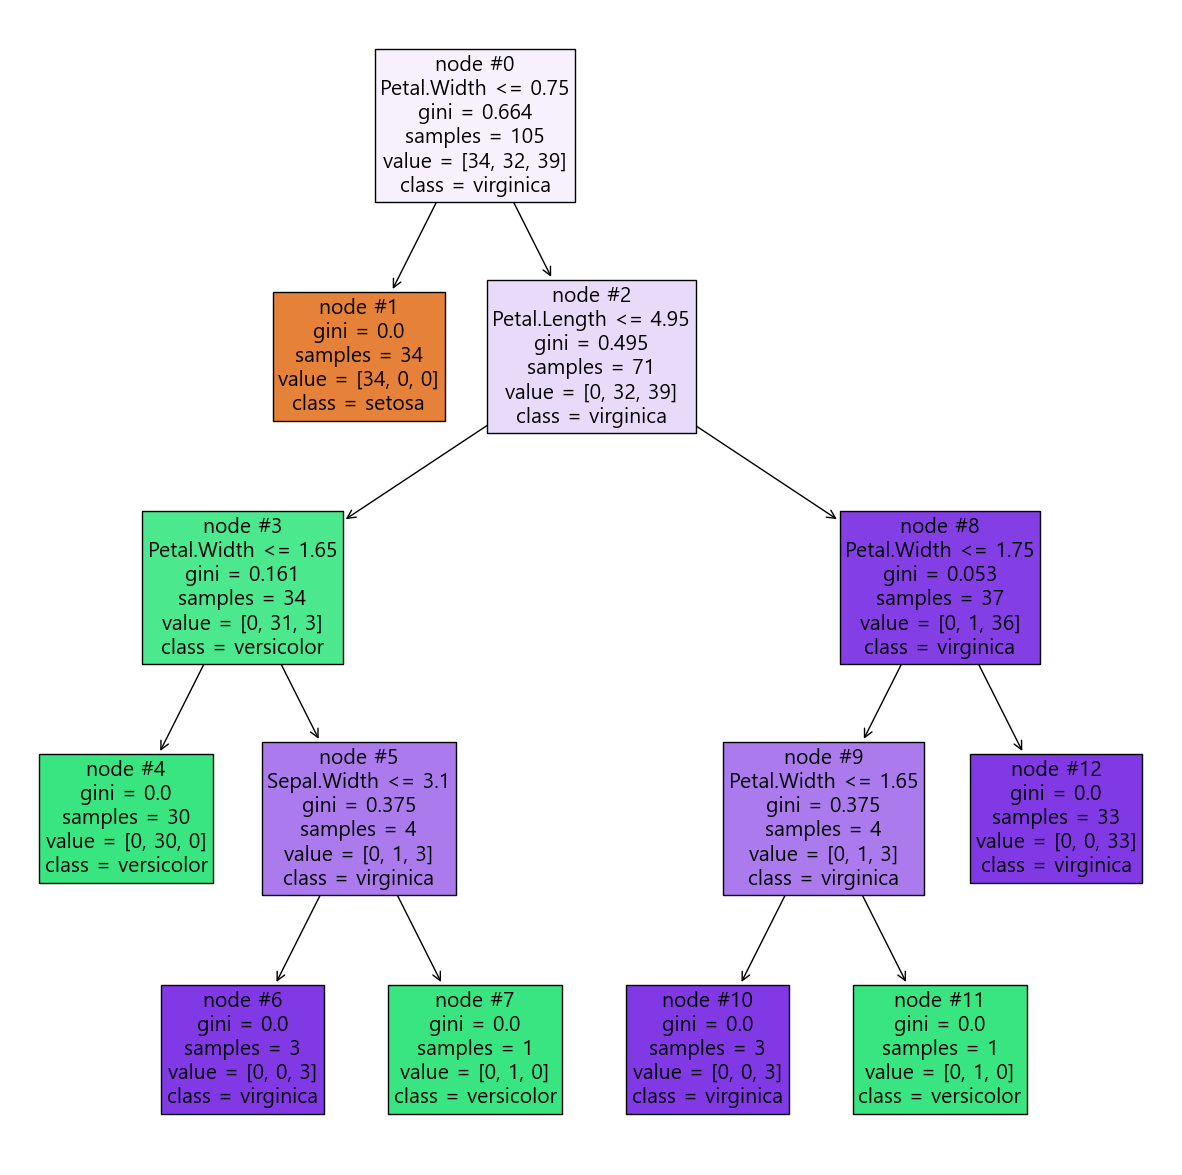

In [8]:
plt.figure( figsize=(15, 15) )

plot_tree( model_dtclf,
           class_names = ['setosa', 'versicolor', 'virginica'],
           feature_names = x_train.columns,
           filled = True,
           node_ids = True,
           fontsize = 15 )
plt.show()

## 결정나무를 텍스트 형식으로 출력
- `sklearn.tree.export_text()`  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

In [9]:
tree_text = export_text( model_dtclf )

print( tree_text )

|--- feature_3 <= 0.75
|   |--- class: setosa
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |--- feature_2 >  4.95
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: versicolor
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: virginica



## 입력변수들의 중요도 확인(확률값)

        feature  importance
0  Sepal.Length    0.000000
1   Sepal.Width    0.021505
2  Petal.Length    0.397670
3   Petal.Width    0.580826



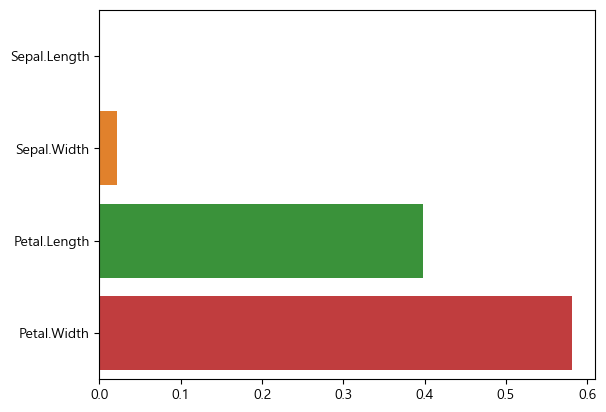

In [10]:
# 입력변수들의 중요도 확인(확률값)

ft_impt = pd.DataFrame( {'feature' : x_train.columns,
                         'importance' : model_dtclf.feature_importances_} )

print( ft_impt )
print()

sb.barplot( x = model_dtclf.feature_importances_,
            y = list( df_iris.drop('Species', axis=1) ) )
plt.show()

# 예측 및 평가

## 학습된 모델로 예측 수행

In [11]:
# test 데이터로 라벨 예측
y_pred = model_dtclf.predict( x_test )

print( 'Accuracy:', model_dtclf.score( x_test, y_test ) )
print()

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

Accuracy: 0.9777777777777777



,y_True,y_Predict,Pred_Result
115,virginica,virginica,True
63,versicolor,versicolor,True
34,setosa,setosa,True
108,virginica,virginica,True
8,setosa,setosa,True
101,virginica,virginica,True
41,setosa,setosa,True
87,versicolor,versicolor,True
77,versicolor,versicolor,True
72,versicolor,versicolor,True


## 평가

### Confusion Matrix
- `pandas.crosstab()`  https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
- 
- `sklearn.metrics.confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- 
- `sklearn.metrics.multilabel_confusion_matrix()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html
- 
- `sklearn.metrics.ConfusionMatrixDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [12]:
conf_mat = pd.crosstab( y_test, y_pred, rownames=['pred'], colnames=['real'] )
conf_mat

real,setosa,versicolor,virginica
pred,,,
setosa,16,0,0
versicolor,0,17,1
virginica,0,0,11


In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [14]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)
cm_multi

array([[[29,  0],
        [ 0, 16]],

       [[27,  0],
        [ 1, 17]],

       [[33,  1],
        [ 0, 11]]], dtype=int64)

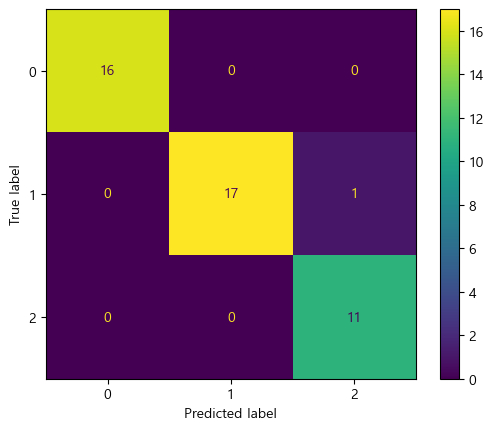

In [15]:
ConfusionMatrixDisplay( cm ).plot()

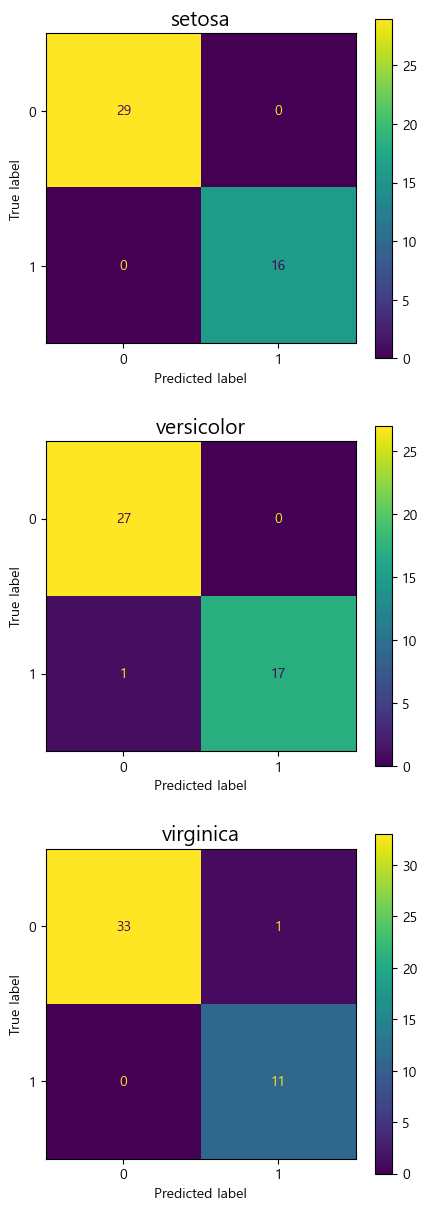

In [16]:
cm_0 = cm_multi[0]
cm_1 = cm_multi[1]
cm_2 = cm_multi[2]

fig = plt.figure( figsize = (5, 15) )

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title( y.unique()[0], size = 15 )

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title( y.unique()[1], size = 15 )

ax2 = fig.add_subplot(3, 1, 3)
ax2.set_title( y.unique()[2], size = 15 )

ConfusionMatrixDisplay(cm_0).plot(ax=ax0)
ConfusionMatrixDisplay(cm_1).plot(ax=ax1)
ConfusionMatrixDisplay(cm_2).plot(ax=ax2)

### 분석 지표
- `sklearn.metrics.accuracy_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

- `sklearn.metrics.classification_report()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [17]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9777777777777777

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        16
  versicolor      1.000     0.944     0.971        18
   virginica      0.917     1.000     0.957        11

    accuracy                          0.978        45
   macro avg      0.972     0.981     0.976        45
weighted avg      0.980     0.978     0.978        45




### ROC curve / AUC (주의!)

[ 주의 !! ] 다중 클래스인 경우에는 ROC curve 또는 AUC 를 구할 때, one-vs-all 방식으로 클래스를 이진화 시키는 과정이 필요하다!! (target에 대한 일종의 One-Hot Encoding)

- `sklearn.metrics.roc_curve()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

- `sklearn.metrics.roc_auc_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

- `sklearn.metrics.RocCurveDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
 
- [참고] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#### Target을 Label Encoding 후 One-vs-All 방식으로 Labels Binarize

- `sklearn.preprocessing.LabelEncoder()`  
  - Methods : `.fit()`, `.transform()`, `.fit_transform()`   
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html  


- `sklearn.preprocessing.label_binarize( y, *, classes, neg_label=0, pos_label=1, sparse_output=False )`  
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html

In [18]:
# 레이블 인코딩 (문자로 된 범주형 데이터를 숫자로 변환)
encoder = LabelEncoder()
y1 = encoder.fit_transform( y )

# 레이블 인코딩 결과를 원핫인코딩 형식으로 변환
y2 = label_binarize(y1, classes=[0, 1, 2])

# 인코딩 전후 비교
pd.DataFrame( { 'y' : y.unique(),
                'y1 (label_encoding)' : np.unique(y1),
                'y2 (label_binarize)': list(set(map(tuple, y2))) } )

,y,y1 (label_encoding),y2 (label_binarize)
0,setosa,0,"(1, 0, 0)"
1,versicolor,1,"(0, 0, 1)"
2,virginica,2,"(0, 1, 0)"


#### 학습/테스트용 데이터셋 분리

In [19]:
x_train, x_test, y2_train, y2_test = train_test_split( x, y2,
                                                      test_size = 0.3,
                                                      random_state = 0 )

#### One-vs-the-rest (OvR) multiclass 모델 생성 및 적합

In [20]:
# 모델 생성
model_ovr = OneVsRestClassifier( model_dtclf )  # 앞서 생성했던 결정나무 모델을 괄호 안에 입력

# 모델 학습
model_ovr.fit( x_train, y2_train )

# 예측 확률 반환 (ROC 곡선에 필요)
y_proba = model_ovr.predict_proba(x_test)

#### ROC curve 및 AUC 출력

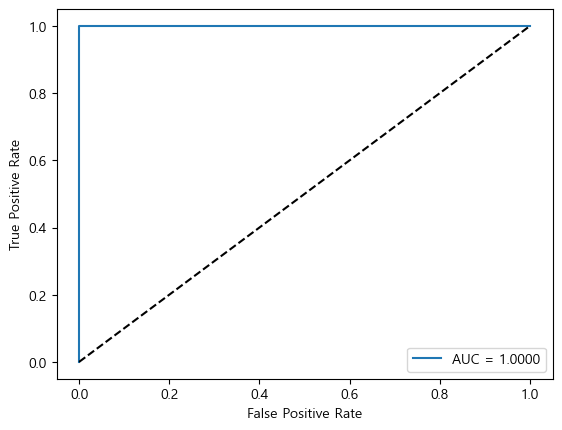

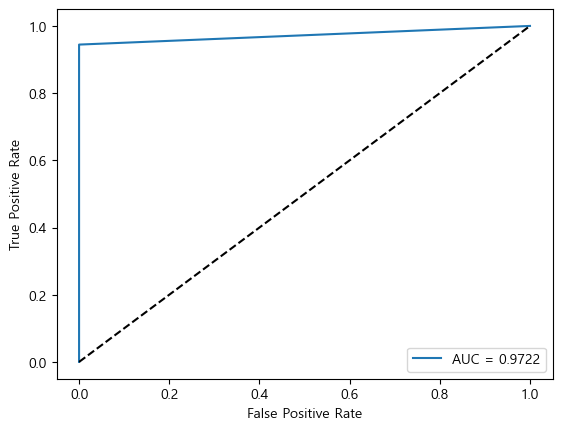

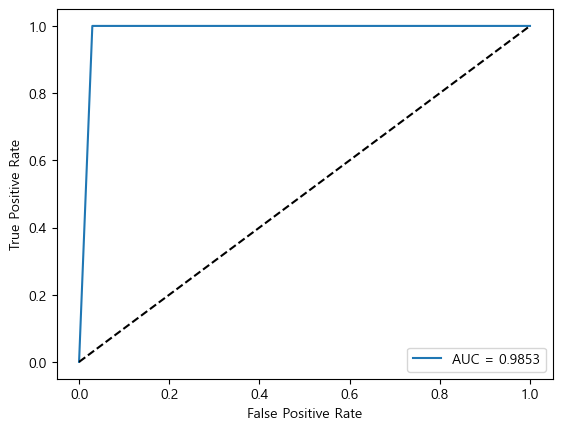

In [21]:
fpr = dict()
tpr = dict()
thresholds = dict()

roc_auc = dict()
for i in list(range(0,3)):
    fpr[i], tpr[i], thresholds[i] = roc_curve( y2_test[:, i], y_proba[:, i] )
    auc = roc_auc_score( y2_test[:, i], y_proba[:, i], multi_class="ovr" )
    
    RocCurveDisplay( fpr[i], tpr[i] ).plot()
    plt.legend( labels = ['AUC = %.4f' % auc],
                loc = 'lower right')
    plt.plot( [0,1], [0,1], 'k--' )
    plt.show()

# 모델 최적화

## Hyper parameter 최적화: `GridSearchCV`
- 교차 검증과 Hyper Parameter 튜닝을 한 번에 수행함.

- `sklearn.model_selection.GridSearchCV()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- Attributes: `cv_results_`, `best_score_`, `best_params_`, `best_estimator_`

- Methods: `get_params()`  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.get_params

### 파라미터 확인 및 평가 조건 설정

In [22]:
# 파라미터 목록 확인
list( model_dtclf.get_params() )

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [23]:
# 평가할 파라미터 split 조건 설정
# max_depth : 결정나무의 최대 깊이, default = None
# min_samples_split : 자식노드를 생성하기 위한 최소 데이터 개수, default = 1
# min_samples_leaf : 리프 노드가 될 수 있는 최소 데이터 개수, default = None
params = { 'max_depth' : [3, 4, 5],
           'min_samples_split' : [1, 2, 3, 4, 5],
           'min_samples_leaf' : [1, 2, 3, 4, 5] }

grid = GridSearchCV( model_dtclf,
                     param_grid = params,
                     cv = 10,
                     scoring = 'accuracy')

# split 조건별로 하이퍼 파라미터 학습/평가
grid.fit( x, y )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

### 최적의 파라미터 결과 확인

In [24]:
df_grid = pd.DataFrame( grid.cv_results_ )

df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            75 non-null     float64
 1   std_fit_time             75 non-null     float64
 2   mean_score_time          75 non-null     float64
 3   std_score_time           75 non-null     float64
 4   param_max_depth          75 non-null     object 
 5   param_min_samples_leaf   75 non-null     object 
 6   param_min_samples_split  75 non-null     object 
 7   params                   75 non-null     object 
 8   split0_test_score        60 non-null     float64
 9   split1_test_score        60 non-null     float64
 10  split2_test_score        60 non-null     float64
 11  split3_test_score        60 non-null     float64
 12  split4_test_score        60 non-null     float64
 13  split5_test_score        60 non-null     float64
 14  split6_test_score        60 

In [25]:
# pd.set_option('display.max_colwidth', None)  # 데이터프레임의 셀 폭 설정 (한 셀의 너비에 내용이 다 안들어갈 경우)
# pd.set_option('display.max_row', 80)  # 데이터프레임의 출력 행 개수 설정 (한 셀에 모든 행 표시가 안될 경우)

df_grid[ ['params','mean_test_score','std_test_score', 'rank_test_score'] ].sort_values(['rank_test_score']).head(30)

,params,mean_test_score,std_test_score,rank_test_score
37,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
36,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
64,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
63,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
62,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
61,"{'max_depth': 5, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
38,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
39,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
14,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1
11,"{'max_depth': 3, 'min_samples_leaf': 3, 'min_s...",0.966667,0.033333,1


### 최적의 파라미터 추출

In [26]:
print("최고 Score: ", str(np.round(grid.best_score_, 4)))
print("최적 Parameters: ",str(grid.best_params_))
print("최적 Estimators: ",str(grid.best_estimator_))

최고 Score:  0.9667
최적 Parameters:  {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
최적 Estimators:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=0)


## 최적 Parameter 조건으로 모델 생성 및 학습

In [27]:
# 의사결정트리 생성
tune_dtclf = DecisionTreeClassifier( max_depth=3,
                                     min_samples_leaf=3,
                                     random_state=0 )

# 모델 학습
tune_dtclf.fit( x_train, y_train )

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=0)

## 최적화된 모델로 시각화

### 최적화된 결정나무 시각화

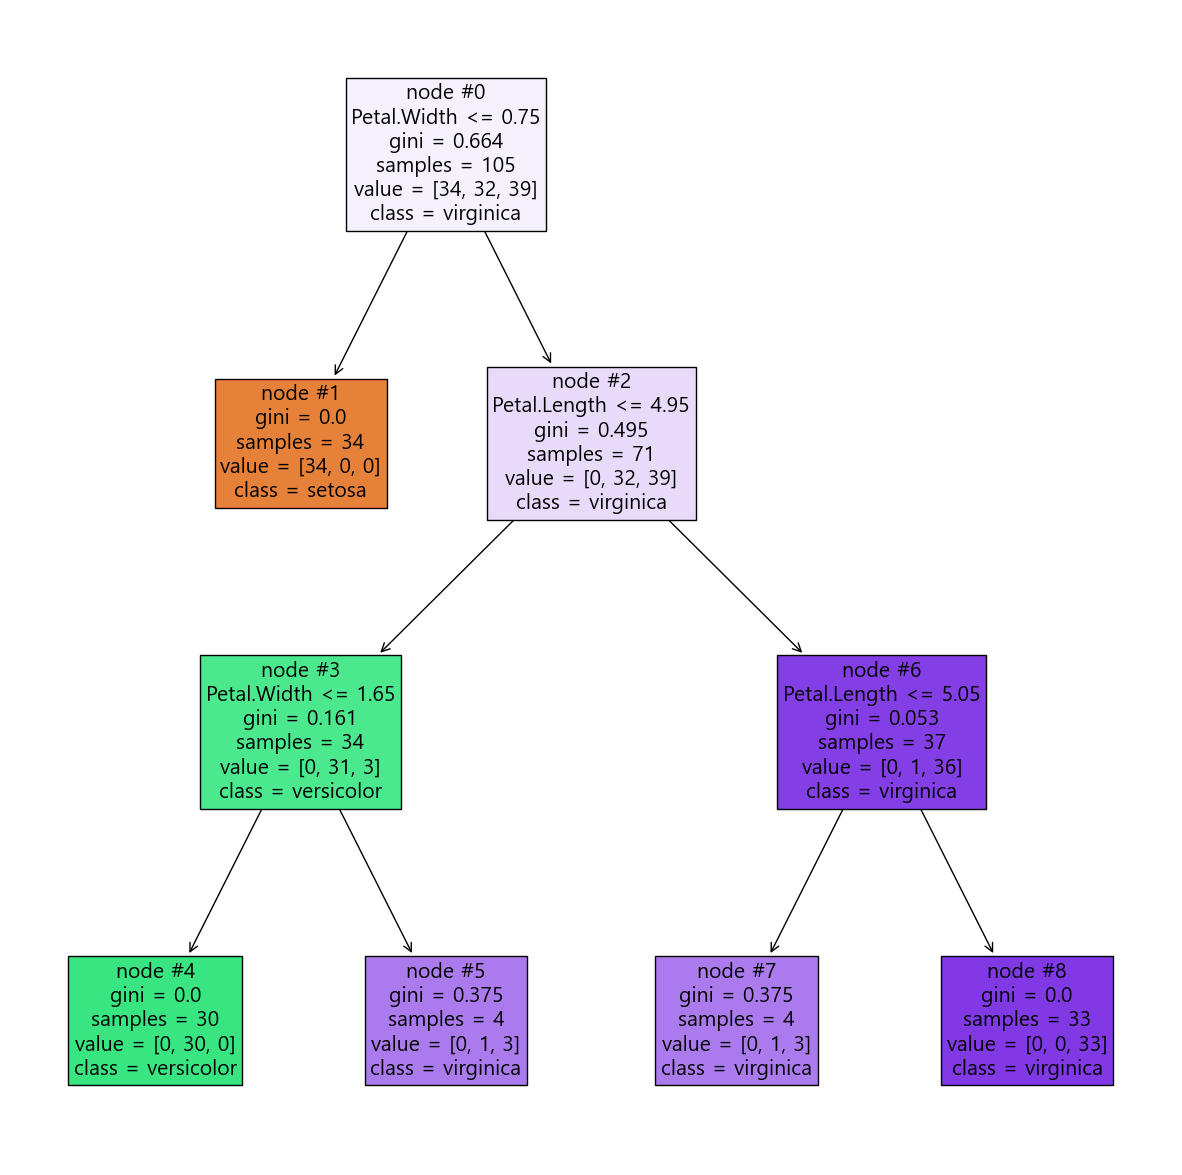

In [28]:
# 시각화
plt.figure( figsize=(15, 15) )

plot_tree( tune_dtclf,
           class_names =  ['setosa', 'versicolor', 'virginica'],
           feature_names = x_train.columns,
           filled = True,
           node_ids = True,
           fontsize = 15  )

plt.show()

## 최적화된 결정나무를 텍스트 형식으로 출력

In [29]:
tree_text = export_text( tune_dtclf )

print( tree_text )

|--- feature_3 <= 0.75
|   |--- class: setosa
|--- feature_3 >  0.75
|   |--- feature_2 <= 4.95
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: virginica
|   |--- feature_2 >  4.95
|   |   |--- feature_2 <= 5.05
|   |   |   |--- class: virginica
|   |   |--- feature_2 >  5.05
|   |   |   |--- class: virginica



### 최적화된 모델의 입력변수들의 중요도 확인(확률값)

        feature  importance
0  Sepal.Length    0.000000
1   Sepal.Width    0.000000
2  Petal.Length    0.422222
3   Petal.Width    0.577778



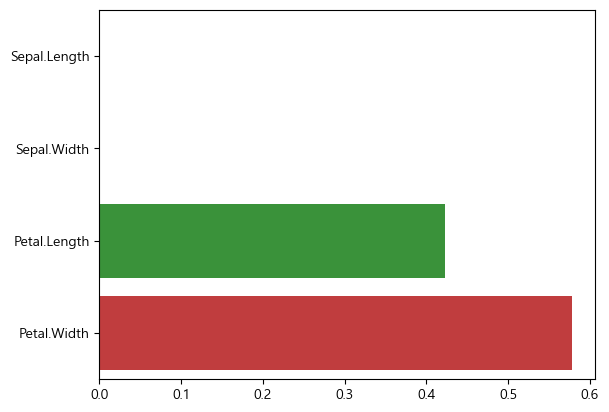

In [30]:
# 입력변수들의 중요도 확인(확률값)

ft_impt = pd.DataFrame( {'feature' : x_train.columns,
                         'importance' : tune_dtclf.feature_importances_} )

print( ft_impt )
print()

sb.barplot( x = tune_dtclf.feature_importances_,
            y = list( df_iris.drop('Species', axis=1) ) )
plt.show()

## 최적화 모델 평가

### 학습된 모델로 예측 수행

In [31]:
# test 데이터로 라벨 예측
y_pred = tune_dtclf.predict( x_test )

print( 'Accuracy:', tune_dtclf.score( x_test, y_test ) )
print()

pd.DataFrame( {'y_True' : y_test,
               'y_Predict' : y_pred,
               'Pred_Result' : y_test == y_pred} ).head(10)

Accuracy: 0.9777777777777777



,y_True,y_Predict,Pred_Result
115,virginica,virginica,True
63,versicolor,versicolor,True
34,setosa,setosa,True
108,virginica,virginica,True
8,setosa,setosa,True
101,virginica,virginica,True
41,setosa,setosa,True
87,versicolor,versicolor,True
77,versicolor,versicolor,True
72,versicolor,versicolor,True


### 평가

#### Confusion Metrix

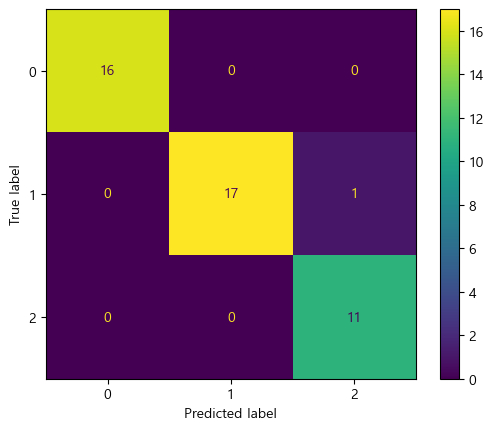

In [32]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay( cm ).plot()

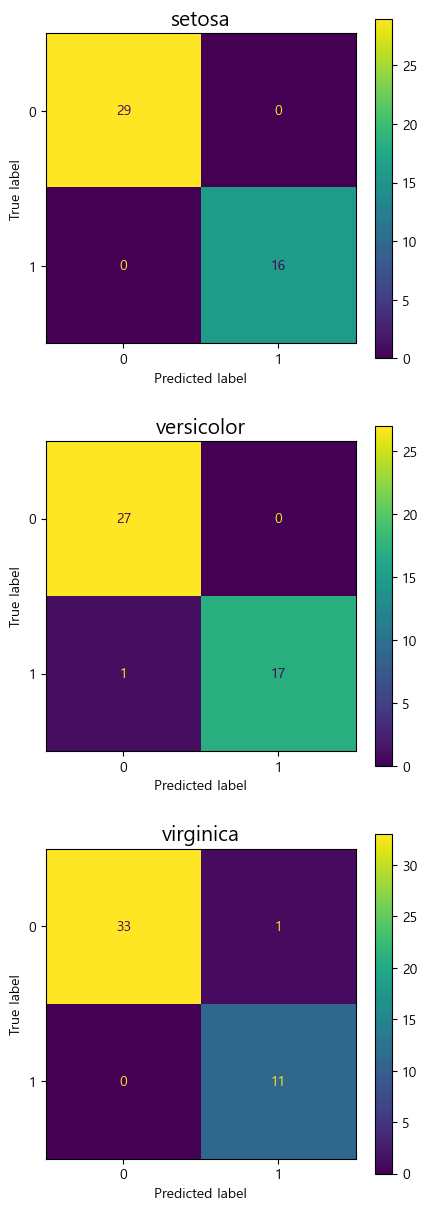

In [33]:
cm_multi = multilabel_confusion_matrix(y_test, y_pred)

fig = plt.figure( figsize = (5, 15) )

ax0 = fig.add_subplot(3, 1, 1)
ax0.set_title( y.unique()[0], size = 15 )

ax1 = fig.add_subplot(3, 1, 2)
ax1.set_title( y.unique()[1], size = 15 )

ax2 = fig.add_subplot(3, 1, 3)
ax2.set_title( y.unique()[2], size = 15 )

ConfusionMatrixDisplay( cm_multi[0] ).plot(ax=ax0)
ConfusionMatrixDisplay( cm_multi[1] ).plot(ax=ax1)
ConfusionMatrixDisplay( cm_multi[2] ).plot(ax=ax2)

#### 분석 지표

In [34]:
print( 'Accuracy: ', accuracy_score(y_test, y_pred) )
print()

print( classification_report(y_test, y_pred, digits = 3) )
print()

Accuracy:  0.9777777777777777

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        16
  versicolor      1.000     0.944     0.971        18
   virginica      0.917     1.000     0.957        11

    accuracy                          0.978        45
   macro avg      0.972     0.981     0.976        45
weighted avg      0.980     0.978     0.978        45




### ROC curve / AUC (주의!)

[ 주의 !! ] 다중 클래스인 경우에는 ROC curve 또는 AUC 를 구할 때, one-vs-all 방식으로 클래스를 이진화 시키는 과정이 필요하다!! (target에 대한 일종의 One-Hot Encoding)

- `sklearn.metrics.roc_curve()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

- `sklearn.metrics.roc_auc_score()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

- `sklearn.metrics.RocCurveDisplay()`  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html
 
- [참고] https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#### Target을 One-vs-All 방식으로 Labels Binarize
- 앞서 이미 인코딩 수행 및 y2 변수에 저장하였으므로 생략

#### One-vs-the-rest (OvR) multiclass 모델 생성 및 적합

In [35]:
# 모델 생성
model_ovr = OneVsRestClassifier( tune_dtclf )  # 앞서 생성했던 최적화 된 결정나무 모델을 괄호 안에 입력

# 모델 학습
model_ovr.fit( x_train, y2_train )

# 예측 확률 반환 (ROC 곡선에 필요)
y_proba = model_ovr.predict_proba(x_test)

#### ROC curve 및 AUC 출력

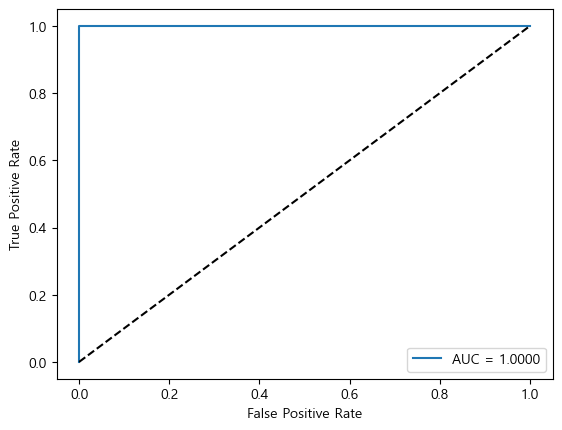

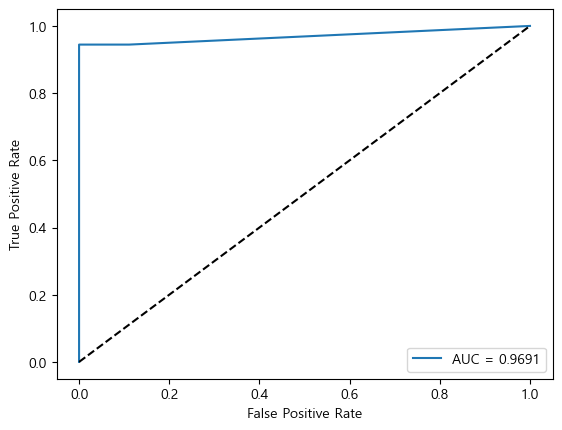

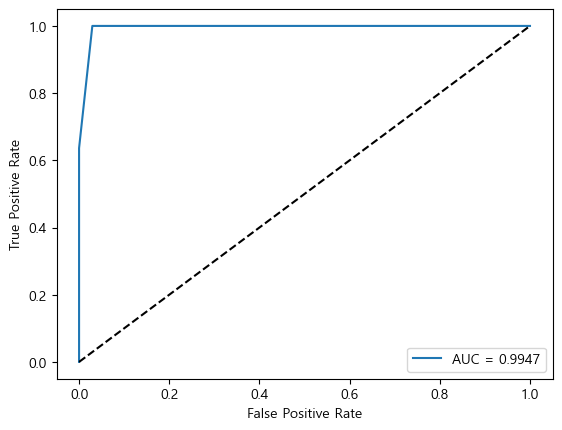

In [36]:
fpr = dict()
tpr = dict()
thresholds = dict()

roc_auc = dict()
for i in list(range(0,3)):
    fpr[i], tpr[i], thresholds[i] = roc_curve( y2_test[:, i], y_proba[:, i] )
    auc = roc_auc_score( y2_test[:, i], y_proba[:, i], multi_class="ovr" )
    
    RocCurveDisplay( fpr[i], tpr[i] ).plot()
    plt.legend( labels = ['AUC = %.4f' % auc],
                loc = 'lower right')
    plt.plot( [0,1], [0,1], 'k--' )
    plt.show()

# [참고] 결정나무의 과적합 여부 확인

## 데이터 전처리

### 2차원 시각화를 위한 변수 지정

In [37]:
# 2차원 시각화를 위해 두 개의 독립변수만 사용
x1 = df_iris.iloc[:, [2, 3] ]
y = df_iris.iloc[:,4]

### y값에 대한 Label Encoding 실행
- `sklearn.preprocessing.LabelEncoder()`  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Methods : `.fit()`  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit
- Methods : `.transform()`  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.transform

In [38]:
# 레이블 인코딩 (문자로 된 범주형 데이터를 숫자로 변환)
encoder = LabelEncoder()
y1 = encoder.fit_transform( y )

# 인코딩 전후 비교
pd.DataFrame( { 'y' : y.unique(),
                'y1 (label_encoding)' : np.unique(y1) } )

,y,y1 (label_encoding)
0,setosa,0
1,versicolor,1
2,virginica,2


### 데이터셋 분리

In [39]:
x1_train, x1_test, y1_train, y1_test  = train_test_split( x1, y1,
                                                          test_size = 0.30,
                                                          random_state = 0 )

## 결정나무 모델 생성 및 train 데이터로 학습

In [40]:
# 결정나무 모델 생성
model_dtclf = DecisionTreeClassifier( random_state = 0 )

# 모델 학습
model_dtclf.fit( x1_train, y1_train )

DecisionTreeClassifier(random_state=0)

## plot 형태로 시각화

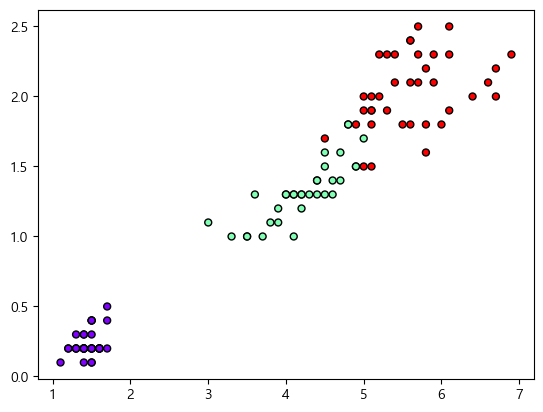

In [41]:
# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter( x1_train['Petal.Length'], x1_train['Petal.Width'],
             marker='o',
             c = y1_train,
             s = 25,
             cmap='rainbow',
             edgecolor='k')
plt.show()

In [42]:
# Classifier의 Decision Boundary를 시각화 하는 함수

def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(x1_train['Petal.Length'], x1_train['Petal.Width'],
               c=y1_train, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

### 특정한 제약없는 결정 트리의 Decsion Boundary 시각화.

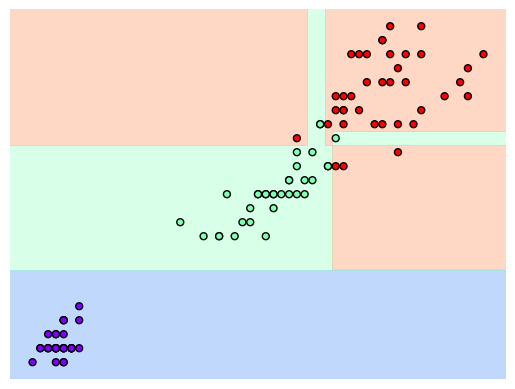

In [43]:
visualize_boundary(model_dtclf, x1_train, y1_train)

### 하이퍼 파라미터 최적화 결과를 적용한 결정 트리의 Decsion Boundary 시각화.

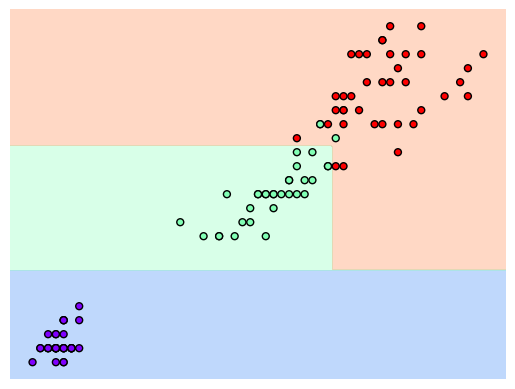

In [44]:
# 앞서 도출된 tune_dtclf 모델 사용
visualize_boundary(tune_dtclf, x1_train, y1_train)